In [1]:
import glob
from pyfasta import Fasta
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import os
import gzip
import statistics


In [37]:
import csv

data = []
with open("../master_table/master_table.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        accession = row['accession']
        length = int(row['length'])
        if length  > 100000: continue
        data += [length]
        
        
print(data)

[425, 499, 4590, 2189, 5453, 7631, 4547, 4129, 6769, 9978, 341, 235, 1911, 880, 14174, 29941, 29993, 3774, 8763, 29906, 29895, 148, 695, 23425, 32362, 8517, 29823, 29093, 10622, 2940, 8462, 29527, 29881, 29885, 29796, 29832, 29930, 22900, 2890, 14735, 2906, 28215, 5155, 28262, 12105, 20397, 2603, 9349, 6083, 6318, 275, 348, 1892, 301, 24249, 16295, 8394, 29970, 21477, 26889, 27075, 29874, 27198, 3512, 24171, 29985, 30014, 16036, 29823, 6999, 11285, 10834, 8400, 29851, 29844, 29750, 29811, 30048, 347, 264, 28075, 25385, 1253, 15511, 56324, 640, 16370, 267, 8139, 13178, 9061, 713, 1320, 1767, 4930, 1052, 260, 541, 21944, 6983, 8239, 29992, 12436, 15394, 29990, 29842, 29840, 287, 31322, 3672, 29986, 7747, 29819, 954, 13750, 26451, 6303, 14709, 29725, 29683, 28113, 22030, 16097, 316, 6061, 2042, 445, 9255, 72868, 643, 5404, 7191, 5528, 27837, 26054, 651, 31306, 2548, 824, 21059, 4601, 29842, 19876, 4402, 1159, 29855, 30076, 4455, 28812, 4644, 29896, 4576, 29881, 29951, 11435, 5587, 9839, 2

10 [          0        2000       10000       15000       20000       25000
       28000       30000       35000 10000000000]
9 [3089 2695  819  515  523  373 2296  448  323]
  Total length of filtered contigs, per accession (kbp)  Freq
0                                                 <2     3089
1                                               2-10     2695
2                                              10-15      819
3                                              15-20      515
4                                              20-25      523
5                                              25-28      373
6                                              28-30     2296
7                                              30-35      448
8                                                >35      323


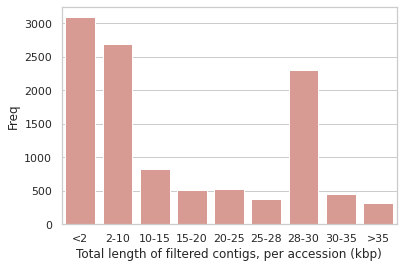

In [136]:
#df = pd.DataFrame(data)
bins = [0,2000,10000,15000,20000,25000,28000,30000,35000,10000000000]
hist, bins  = np.histogram(data,bins=bins)

print(len(bins),bins)
print(len(hist),hist)

df = pd.DataFrame({'Total length of filtered contigs, per accession (kbp)':map(lambda i: (str(bins[i]//1000)+"-"+str(bins[i+1]//1000)+""
                                                         if (i < len(bins[1:])-1 and i > 0 ) 
                                                         else (">35" 
                                                               if i >= len(bins[1:])-1 else "<2")),
                                              range(len(bins[1:]))), 
                         'Freq':hist})
print(df)
sns.set(style="whitegrid")
g = sns.barplot(data=df,x="Total length of filtered contigs, per accession (kbp)",y="Freq",color="salmon", saturation=.5)
g.get_figure().savefig("total_length_filtered_contigs.png")

In [55]:
df = sns.load_dataset('tips') 
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [103]:
list(map(lambda i,x:str(x),enumerate([1,2,3])))

TypeError: <lambda>() missing 1 required positional argument: 'x'

148 OTUs 97%
279 OTUs 99%


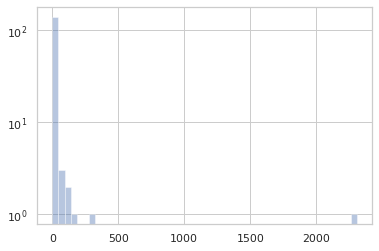

In [7]:
def strip(x):
    return x.replace('/G','').replace('/A','')
from collections import defaultdict
otu99, otu97 = set(), set()
dotu97 = defaultdict(list)
for line in open("../lists/label_otu.id99_97.tsv"):
    if len(line) == 0: continue
    label, ex99, ex97 = line.strip().split()
    label, ex99, ex97 = strip(label), strip(ex99), strip(ex97)
    otu99.add(ex99)
    otu97.add(ex97)
    #print(label,ex99,ex97)
    dotu97[ex97] += [label]

print(len(otu97),"OTUs 97%")
print(len(otu99),"OTUs 99%")
sns.set(style="whitegrid")
ax = sns.distplot([len(dotu97[x]) for x in dotu97],kde=False)

ax.set_yscale('log')